In [257]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [258]:
path='/Users/priyanujkashyap/Documents/GitHub/KWS24/sunspot_handson'

In [259]:
path=path+'/'

In [260]:
path

'/Users/priyanujkashyap/Documents/GitHub/KWS24/sunspot_handson/'

In [261]:
baboon_img=plt.imread(path+'baboon.jpg')

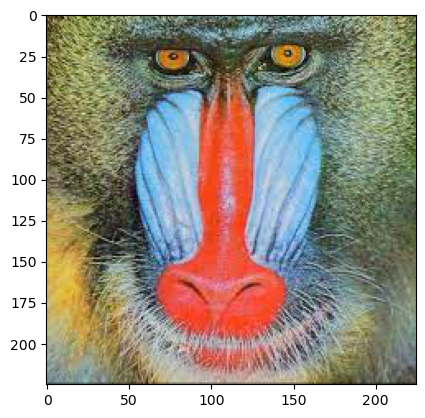

In [262]:
plt.imshow(baboon_img)

In [263]:
baboon_img.shape

(225, 225, 3)

In [264]:
baboon_img.dtype

dtype('uint8')

In [265]:
baboon_cv2_img=cv2.imread(path+'baboon.jpg')

In [266]:
cv2.imshow('baboon',baboon_cv2_img,)

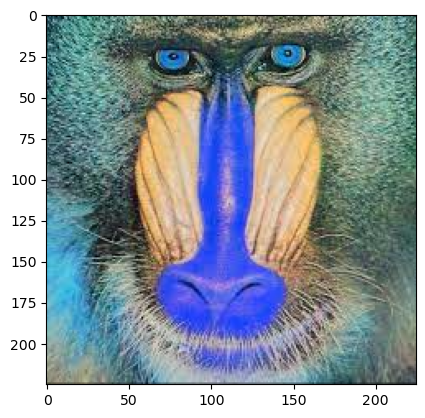

In [267]:
plt.imshow(baboon_cv2_img)

In [268]:
baboon_img_rgb = cv2.cvtColor(baboon_cv2_img, cv2.COLOR_BGR2RGB)

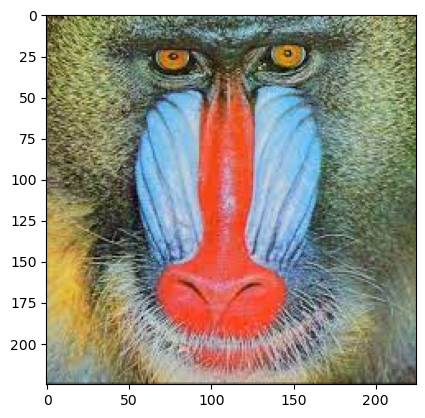

In [269]:
plt.imshow(baboon_img_rgb)

In [270]:
from scipy import ndimage
from skimage import data

In [271]:
bbimg=baboon_img_rgb

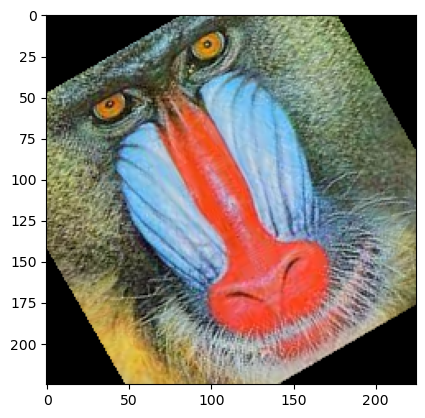

In [272]:
rot_bimg = ndimage.rotate(bbimg, 30, reshape=False)
plt.imshow(rot_bimg)

In [273]:
from skimage.color import rgb2gray

In [274]:
gbimg=rgb2gray(bbimg)

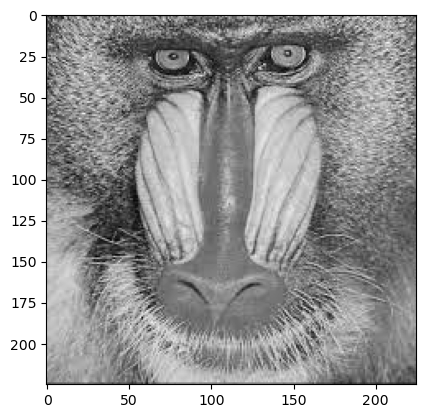

In [275]:
plt.imshow(gbimg,cmap='gray')

In [276]:
from skimage.util import img_as_ubyte
gbimg=img_as_ubyte(gbimg)

In [277]:
# 1st and 3rd args: Image name, 2nd & 4th args: Caption
def plot_comparison(original, name, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)        # displays original input image
    ax1.set_title(name)
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)        # displays processed image
    ax2.set_title(filter_name)
    ax2.axis('off')

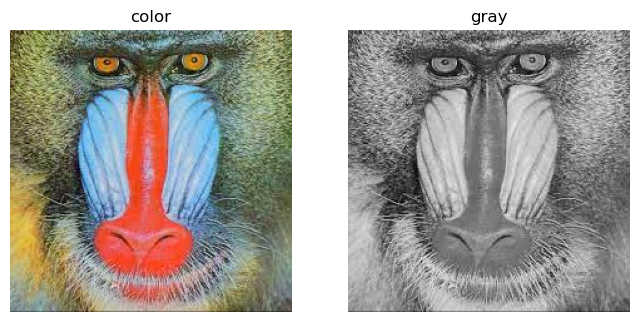

In [278]:
plot_comparison(bbimg,'color',gbimg,'gray')

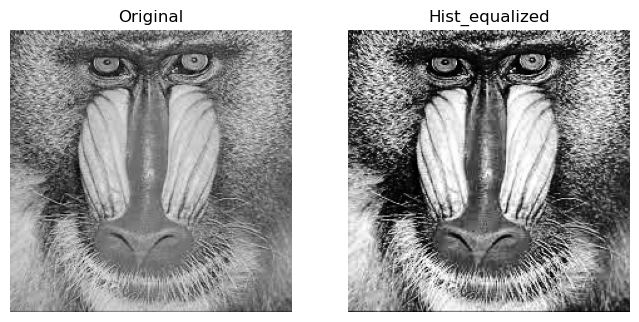

In [279]:
from skimage import exposure  # to call histogram equalization function
heq_gbimg = exposure.equalize_hist(gbimg)
plot_comparison(gbimg, 'Original', heq_gbimg, 'Hist_equalized')

(array([[ 0.,  5., 17., ..., 53.,  3.,  0.],
        [ 0.,  3., 11., ..., 68.,  0.,  0.],
        [ 0.,  3., 16., ..., 73.,  3.,  0.],
        ...,
        [ 0.,  1., 12., ..., 10.,  0.,  0.],
        [ 0.,  0., 12., ...,  5.,  1.,  0.],
        [ 0.,  0.,  8., ...,  2.,  0.,  0.]]),
 array([  1. ,  24.9,  48.8,  72.7,  96.6, 120.5, 144.4, 168.3, 192.2,
        216.1, 240. ]),
 <a list of 225 BarContainer objects>)

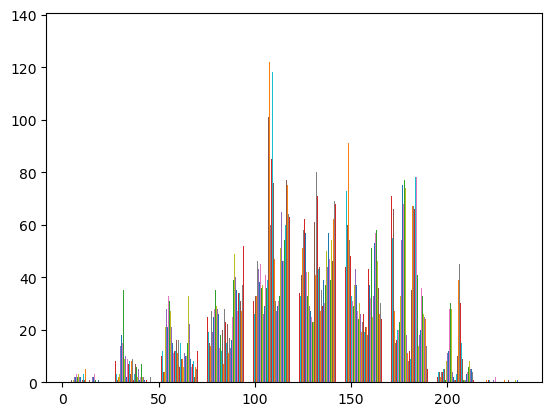

In [280]:
plt.hist(gbimg)

(array([[28., 26., 21., ..., 42., 43.,  8.],
        [19., 32., 18., ..., 33., 49., 14.],
        [24., 27., 15., ..., 19., 51., 21.],
        ...,
        [16., 52., 29., ..., 10.,  8.,  2.],
        [20., 42., 34., ...,  5.,  1.,  5.],
        [13., 48., 24., ...,  6.,  2.,  0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 225 BarContainer objects>)

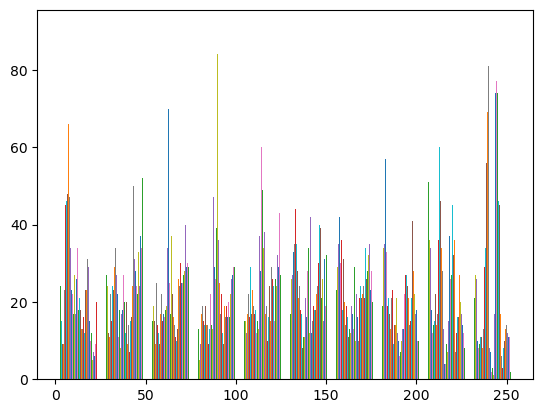

In [281]:
plt.hist(img_as_ubyte(heq_gbimg))

In [282]:
from skimage.morphology import erosion,dilation,opening,closing,disk,square
from skimage import data

In [283]:
selem=disk(3)
camera=data.camera()
eroded=erosion(camera,selem)
dilated=dilation(camera,selem)


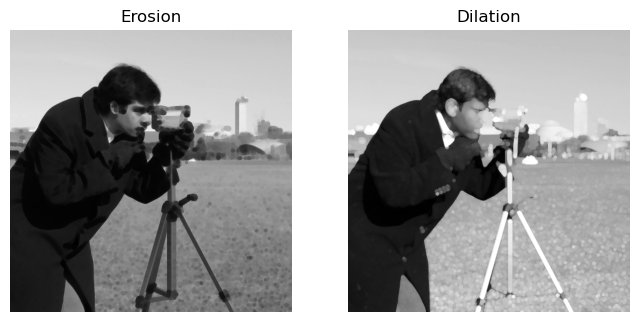

In [284]:
plot_comparison(eroded, 'Erosion', dilated, 'Dilation')

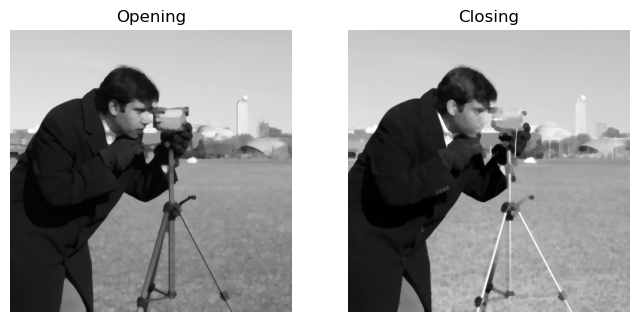

In [285]:
opened=opening(camera,selem)
closed=closing(camera,selem)
plot_comparison(opened, 'Opening', closed, 'Closing')

In [286]:
from skimage import exposure

In [287]:
gc5 = exposure.adjust_gamma(camera, .5)
gc9=exposure.adjust_gamma(camera, .9)

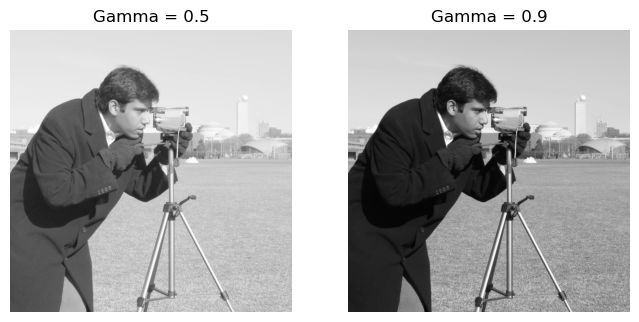

In [288]:
plot_comparison(gc5, 'Gamma = 0.5', gc9, 'Gamma = 0.9')

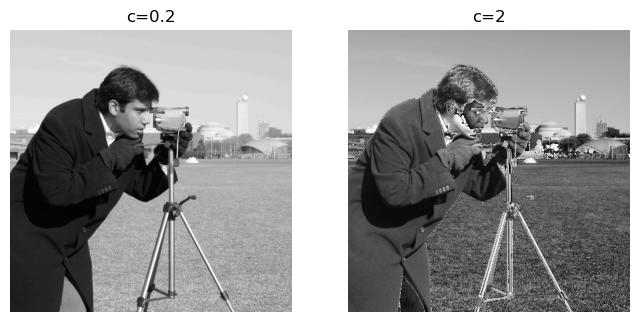

In [289]:
lg2 = exposure.adjust_log(camera, 0.2)
lg5 = exposure.adjust_log(camera, 2)
plot_comparison(lg2, 'c=0.2', lg5,'c=2')

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


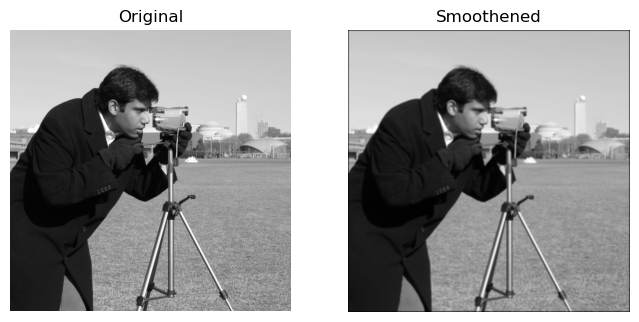

In [290]:
from scipy.signal import convolve2d
new_filter=np.ones((3,3),dtype='int8')
smooth_filter=new_filter*(1/9)       # Averaging filter (Lowpass filter)
print(smooth_filter)
img=data.camera()
new_img=convolve2d(img, smooth_filter)
plot_comparison(img, 'Original', new_img,'Smoothened')

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


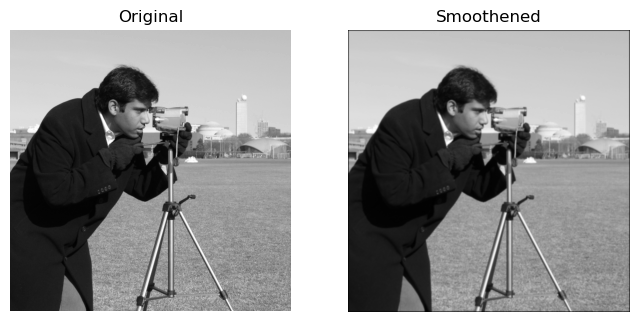

In [291]:
# Image Smoothening
new_filter=np.array([[1,2,1],[2,4,2],[1,2,1]])
smooth_filter=new_filter*(1/16)      # Weighted average
print(smooth_filter)
img=data.camera()
new_img=convolve2d(img, smooth_filter)
plot_comparison(img, 'Original', new_img,'Smoothened')

[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


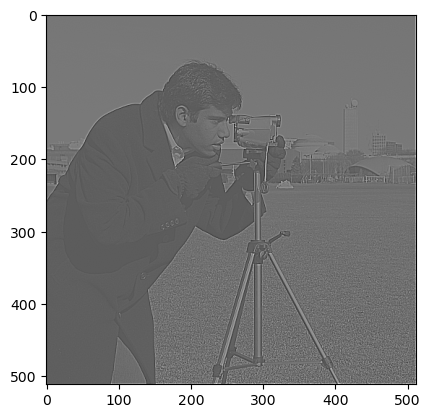

In [292]:
# Image sharpening
new_filter=np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
print(new_filter)
img=data.camera()
new_img=convolve2d(img, new_filter,mode='same')
plt.imshow(new_img,cmap='gray')

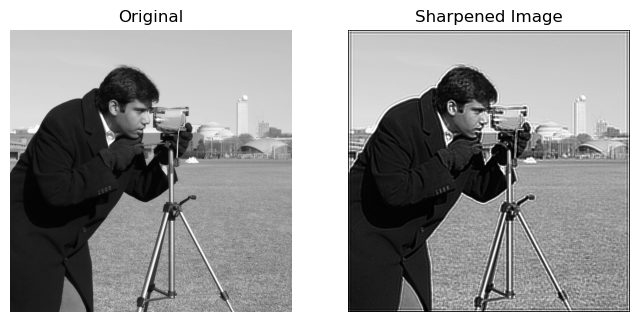

In [293]:
# Image sharpening
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as conv2
from skimage import color, data, restoration
from skimage.util import img_as_float64
astro = img_as_float64(data.camera())
psf = np.ones((5, 5)) / 25
deconvolved_RL = restoration.richardson_lucy(astro, psf, num_iter=10)  # recovering an underlying image that has been blurred
plot_comparison(astro, 'Original', deconvolved_RL,'Sharpened Image')

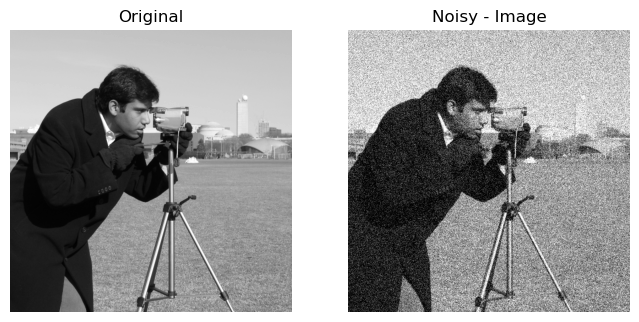

In [294]:
from skimage.util import random_noise  # adding random noise in image
sigma = 0.155
noisy = random_noise(camera, var=sigma**2)  # random_noise function adds noise in original image
plot_comparison(camera, 'Original', noisy, 'Noisy - Image')

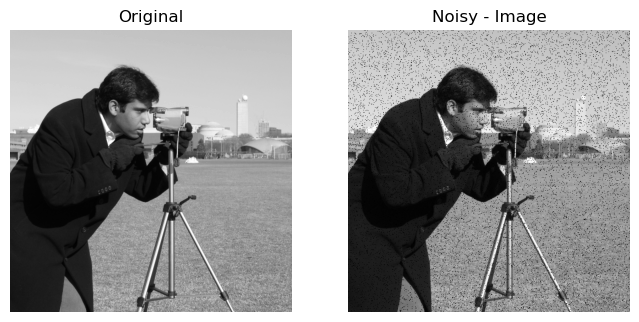

In [295]:

noisy = random_noise(camera, mode='pepper')  # random_noise function adds noise in original image
plot_comparison(camera, 'Original', noisy, 'Noisy - Image')

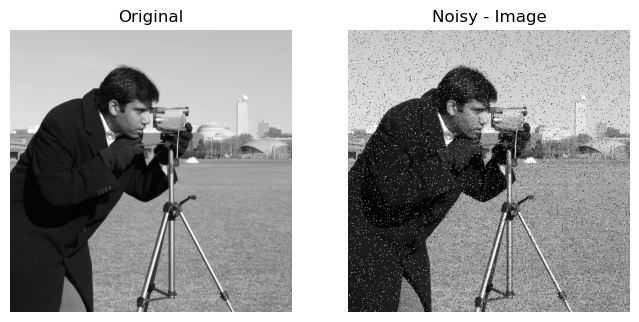

In [296]:
noisy = random_noise(camera, mode='s&p')  # random_noise function adds noise in original image
plot_comparison(camera, 'Original', noisy, 'Noisy - Image')

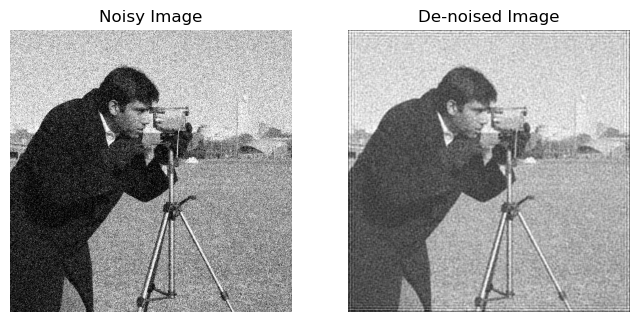

In [297]:
from scipy.signal import convolve2d as conv2
from skimage import restoration
rng = np.random.default_rng()
psf = np.ones((5, 5)) / 25
sigma = 0.155
noisy = random_noise(data.camera(), var=sigma**2)
camera =img_as_float64(noisy)
cam = conv2(camera, psf, 'same')
cam += 0.1 * cam.std() * rng.standard_normal(cam.shape)

deconvolved, _ = restoration.unsupervised_wiener(cam, psf)
plot_comparison(camera, 'Noisy Image', deconvolved,'De-noised Image')

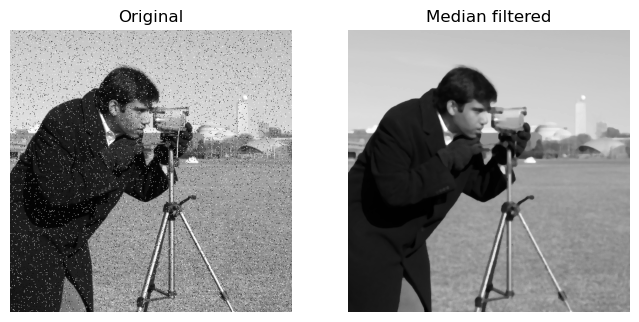

In [298]:
from skimage import data
from skimage.morphology import disk
from skimage.filters import median
noisy = random_noise(data.camera(), mode='s&p')
med = median(noisy, disk(3))
# plt.imshow(med,cmap='gray')
plot_comparison(noisy, 'Original', med,'Median filtered')

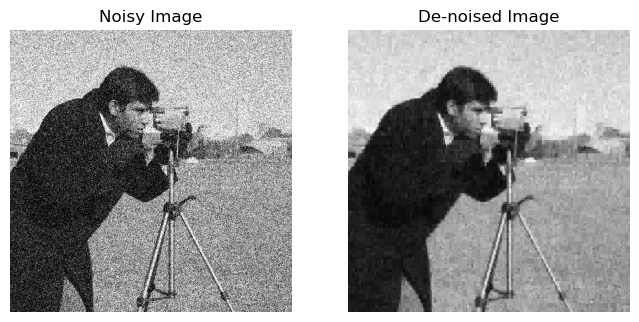

In [299]:
from skimage.restoration import denoise_wavelet  # Perform wavelet denoising on an image
sigma = 0.155
noisy = random_noise(camera, var=sigma**2)
denoised=denoise_wavelet(noisy, rescale_sigma=False)
plot_comparison(noisy, 'Noisy Image', denoised,'De-noised Image')

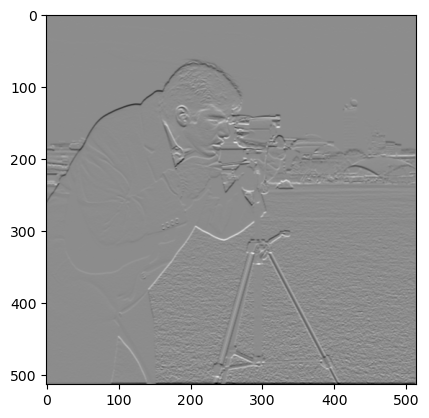

In [300]:
sobel=[[1,2,1],[0,0,0],[-1,-2,-1]] # sobel filter for horizontal edges
from scipy import ndimage
from scipy.signal import convolve2d
h_img=convolve2d(data.camera(), sobel)
plt.imshow(h_img,cmap='gray')

In [301]:
sobel=np.transpose(sobel)
print(sobel)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


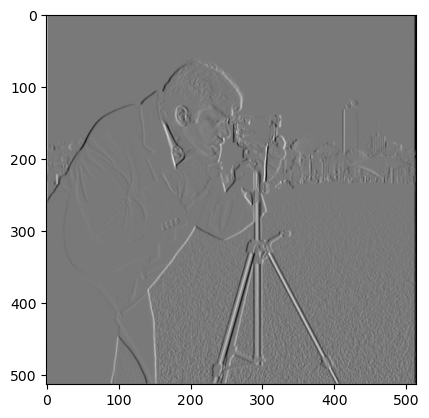

In [302]:
v_img=convolve2d(data.camera(), sobel)
plt.imshow(v_img,cmap='gray')

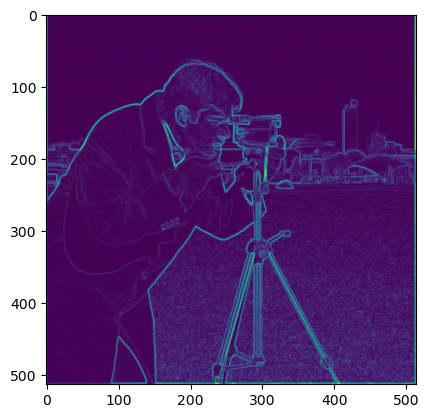

In [303]:
final_img=np.sqrt(np.square(h_img)+np.square(v_img))
plt.imshow(final_img)

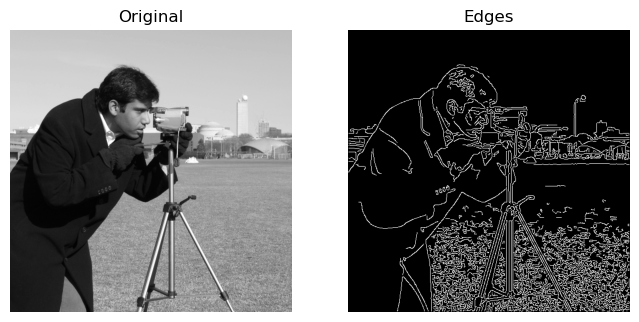

In [304]:
from skimage.feature import canny
img = data.camera()
edges = canny(img/255.)   # canny function for edge based segmentation
plot_comparison(img, 'Original', edges,'Edges')
from scipy import ndimage as ndi
fill_edges = ndi.binary_fill_holes(edges)